<a href="https://colab.research.google.com/github/HikariJadeEmpire/THNumber_img_classification/blob/main/numberclassifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#pip install opencv-python

# Choose one (for Cross Validation)
#pip install pycaret
#pip install tune-sklearn ray[tune]

# STEP 1 : Importing

In [2]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing OpenCV - the computer vision library
import cv2

# import the modules - Directory management
import glob
import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# STEP 1.1 : SET an important Variables

In [5]:
main_dir = "./Thainumber"

# STEP 2 : Preparing & inspection

Prepare for inspections

In [6]:
file_path_all = list( glob.glob( main_dir + '/**/*.png' ) )

In [7]:
labels = list( map(lambda x: os.path.split( os.path.split(x)[0] )[1] , file_path_all) )

filepath = pd.Series(file_path_all, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)   # Return a random sample of items from an axis of object.
data

,Filepath,Label
0,./Thainumber\1\one6.png,1
1,./Thainumber\6\six7.png,6
2,./Thainumber\2\2-5.png,2
3,./Thainumber\0\zero.png,0
4,./Thainumber\0\IMG_0955.png,0
...,...,...
295,./Thainumber\8\8-03.png,8
296,./Thainumber\2\IMG_0875.png,2
297,./Thainumber\7\7-14.png,7
298,./Thainumber\6\6-4.png,6


In [8]:
data.shape

(300, 2)

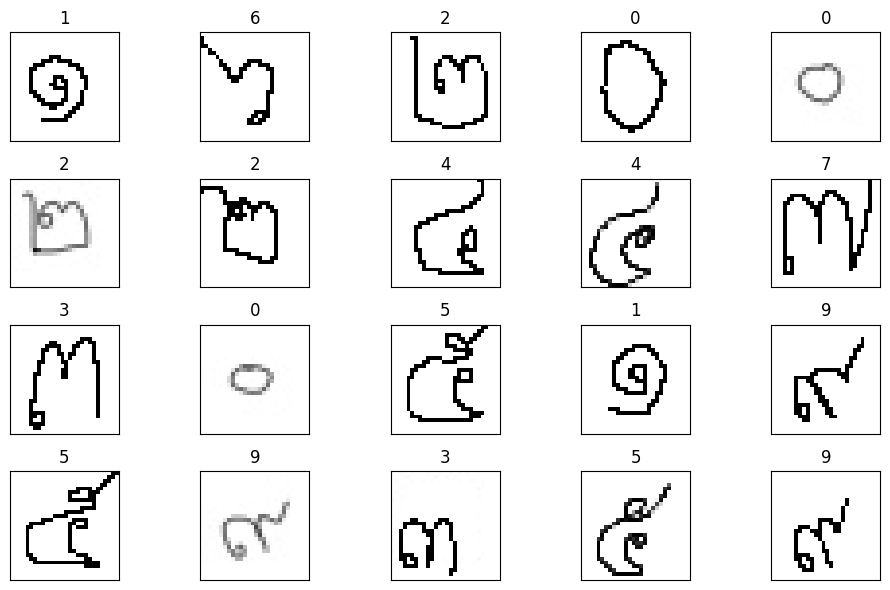

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,6), subplot_kw = {'xticks':[],'yticks':[]} )

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

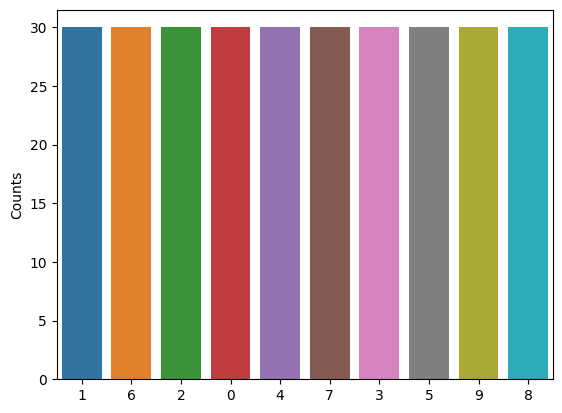

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.ylabel('Counts')

Prepare for Training

In [11]:
# Prepare X and Y

Before_x = data['Filepath']
y = data['Label']

# To work with X, we need to flatten the images first.
read_x = []

for i in Before_x :
    img_arr = cv2.imread(i)
    img_arr = img_arr.flatten()
    read_x.append(img_arr)

x = np.asarray(read_x)

In [12]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [13]:
df = pd.concat([x,y] , axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,Label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,2
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [14]:
# Binarize the output

y = preprocessing.label_binarize( y , classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
#print(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state = 42 )

# STEP 3 : Train 

<h4>Cross Validation : AutoML </h4>
By : Pycaret

In [16]:
from pycaret.classification import *

s = setup( df, target = 'Label', session_id = 123, train_size = 0.7  )

In [17]:
best = s.compare_models( sort = 'Accuracy', fold = 5, n_select = 5 )
pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:31:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6143,0.9053,0.6143,0.6453,0.6040,0.5714,0.5763,1.362
et,Extra Trees Classifier,0.6000,0.9197,0.6000,0.6173,0.5909,0.5555,0.5595,1.312
lr,Logistic Regression,0.5952,0.9132,0.5952,0.6538,0.5871,0.5501,0.5564,2.340
svm,SVM - Linear Kernel,0.5667,0.0000,0.5667,0.6088,0.5406,0.5185,0.5355,1.118
nb,Naive Bayes,0.4667,0.7040,0.4667,0.5635,0.4489,0.4079,0.4279,1.150
lightgbm,Light Gradient Boosting Machine,0.4619,0.8599,0.4619,0.4727,0.4504,0.4020,0.4055,1.584
ridge,Ridge Classifier,0.4286,0.0000,0.4286,0.4948,0.4192,0.3649,0.3716,1.086
gbc,Gradient Boosting Classifier,0.4143,0.8053,0.4143,0.4053,0.3947,0.3485,0.3518,6.184
lda,Linear Discriminant Analysis,0.4143,0.7870,0.4143,0.4160,0.3921,0.3495,0.3558,1.164
knn,K Neighbors Classifier,0.3333,0.7433,0.3333,0.3216,0.2924,0.2590,0.2679,1.618


In [18]:
print(best)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), LogisticRegression

In [21]:
tuned_model = tune_model( best[0], optimize = 'Accuracy', n_iter = 30, fold = 5 )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:38:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.9339,0.6429,0.6760,0.6382,0.6023,0.6061
1,0.6667,0.9121,0.6667,0.7027,0.6657,0.6295,0.6335
2,0.5714,0.9120,0.5714,0.6321,0.5765,0.5230,0.5270
3,0.5952,0.9119,0.5952,0.6266,0.5946,0.5504,0.5532
4,0.5714,0.9022,0.5714,0.6185,0.5641,0.5227,0.5278
Mean,0.6095,0.9144,0.6095,0.6512,0.6078,0.5656,0.5695
Std,0.0387,0.0104,0.0387,0.0326,0.0383,0.0431,0.0430


Fitting 5 folds for each of 30 candidates, totalling 150 fits


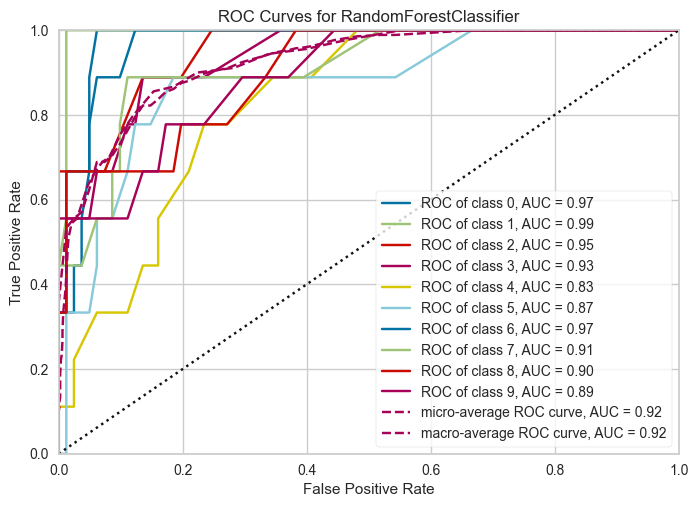

In [22]:
plot_model(tuned_model, plot = 'auc')

<h4>Pipeline</h4>

In [ ]:
steps = [
    ('scalar', MinMaxScaler()),
    ('PCA', PCA( n_components=2 ) )
]

pipeline = Pipeline(steps)

In [ ]:
pr = pipeline.fit(X_train, y_train)

# STEP 4 : Test